## Sentiment Analysis using NLTK

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

### Data loading

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd

# Load your dataset

df = pd.read_csv('train_data.csv')

# Separate data by label
df_label_0 = df[df['label'] == 0].sample(5000, random_state=42)
df_label_1 = df[df['label'] == 1].sample(5000, random_state=42)

# Combine and shuffle the data
data= pd.concat([df_label_0, df_label_1]).sample(frac=1, random_state=42).reset_index(drop=True)


In [6]:
data.shape

(10000, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9995 non-null   object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


### Handling imbalanced dataset

In [9]:
data['label'].value_counts()

label
1    5000
0    5000
Name: count, dtype: int64

In [10]:
#data=data.drop(data[data['label'] ==0].tail(500000).index) #remove the last 5,00,000 rows specifically where the label is 0. 

In [11]:
#data.info()

In [12]:
#data.shape

In [13]:
#data['label'].value_counts()  

### HAndling missing values

In [15]:
data.isnull().sum()

text     5
label    0
dtype: int64

In [16]:
data.dropna(inplace=True) #removing rows having NaN values

In [17]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
data.shape

(9995, 2)

In [19]:
data['label'].value_counts()    #looks balanced dataset now

label
1    5000
0    4995
Name: count, dtype: int64

### Working with Label

<Axes: xlabel='label'>

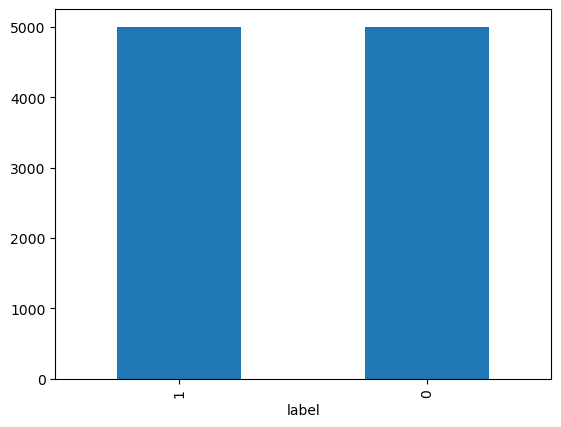

In [21]:
data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

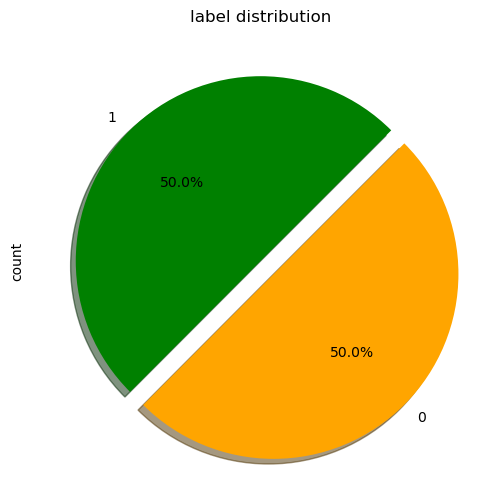

In [22]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['label'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

### Working with Text

In [24]:
data['text'][999]

"@jdar Every party has a pooper  Today it's you hehe"

## Cleaning text (Pre-Processing)

removing HTML Tags

extracting emojies # The pattern re.compile('(?::|;|=)(?:-)?(?:)|(|D|P)') is a regular expression used to match and extract emojis from a given text.

removing special chars,puntuation,sumbols

lower casing

removing stopwords

tokenization

In [26]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [27]:

# Define stopwords and a comprehensive emoji pattern
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile(
    '['
    u'\U0001F600-\U0001F64F'  # Emoticons
    u'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
    u'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
    u'\U0001F700-\U0001F77F'  # Alchemical Symbols
    u'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
    u'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
    u'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
    u'\U0001FA00-\U0001FA6F'  # Chess Symbols
    u'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
    u'\U00002702-\U000027B0'  # Dingbats
    u'\U000024C2-\U0001F251'  # Enclosed characters
    ']+', flags=re.UNICODE
)

def preprocessing(text):
    # Step 1: Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    
    # Step 2: Extract emojis from text
    emojis = emoji_pattern.findall(text)
    
    # Step 3: Remove special characters, numbers, and extra whitespace, convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', ' ', text).lower()
    
    # Step 4: Initialize the Porter Stemmer
    prter = PorterStemmer()
    
    # Step 5: Tokenize, remove stopwords, and apply stemming
    words = [prter.stem(word) for word in text.split() if word not in stopwords_set]
    
    # Step 6: Combine cleaned text and extracted emojis
    processed_text = " ".join(words + emojis)
    
    return processed_text


In [28]:
##just for checking purpose
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world'

### Using apply() function 

Pre-processing each text from each row of datasetusing apply() function and lambda in it

In [30]:
data['text'] = data['text'].apply(lambda x: preprocessing(x))

In [31]:
data['text']

0                   jesznadieh english fine sarcast ignor
1       cheval izzat conquer tv stuck bedroom noth man...
2        watch faber get ko mike brown st round new champ
3                     thebrandicyru aw peopl assum alottt
4       zachyd lulz smoke da bud sick two week think b...
                              ...                        
9995                                  chri remo awn thank
9996    xoangelbabiixo babygirl thatmjgurl kevinjlov a...
9997    ricki chotai thank actual ask everyon earlier ...
9998                                    work miss graduat
9999                      kellyolexa schroding cat specif
Name: text, Length: 9995, dtype: object

### Visualizing Negative and Positive Words

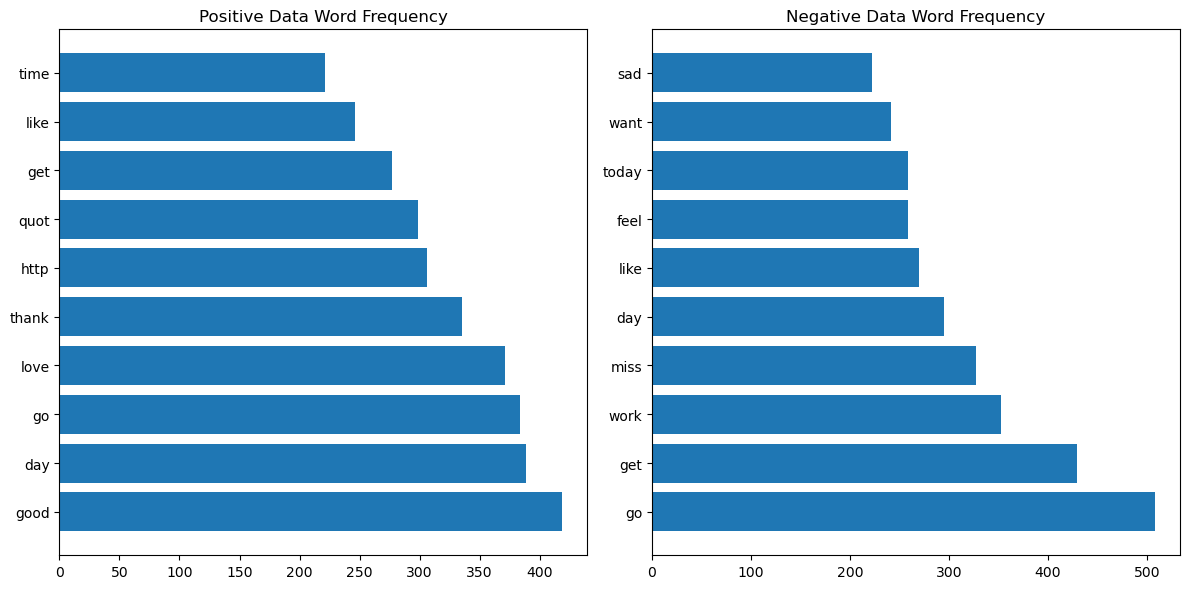

In [33]:
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata = negdata['text']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

### TF-IDF Vertorizer to convert the raw documents into feature matrix

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
# Separate labels and text data
y = data['label'].values
X = tfidf.fit_transform(data['text'])

In [36]:
data['label'].values

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

### Training Machine Learning Model for Sentiment Analysis

Now to train a machine learning model I will split the data into 50 percent training and 50 percent test sets:

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3,shuffle=False)

### Using LogisticRegressionCV

In [40]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    8.9s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.0s finished


### Accuracy

In [42]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7252417472490831


## Pickle files

Pickle saves Python objects to files so you can easily load and use them later.

Imagine you trained a machine learning model that took hours to finish. With pickle, you can save this model so you can load it back later and skip the retraining process.

Transferring Data: pickle also helps in sending Python data to other programs or even different parts of your code without changing its structure.

In [79]:

import pickle
pickle.dump(clf,open('clf.pkl','wb'))  #it will save my clf trained model in clf.pkl 
pickle.dump(tfidf,open('tfidf.pkl','wb')) #wb means write in bytes

### Predicition for testing

In [82]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [84]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")

positive comment
